In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay

In [155]:
train = pd.read_csv("data/train.csv")

In [156]:
pd.set_option('display.max_columns', None)
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [157]:
train.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [158]:
# Drop "Unnamed: 0"

train.drop("Unnamed: 0", axis = 1, inplace = True)

In [159]:
# Fill N/A values with the mean.

train["Arrival Delay in Minutes"].mean()

train["Arrival Delay in Minutes"].fillna(15.18, inplace = True)

In [160]:
train.dtypes

id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival De

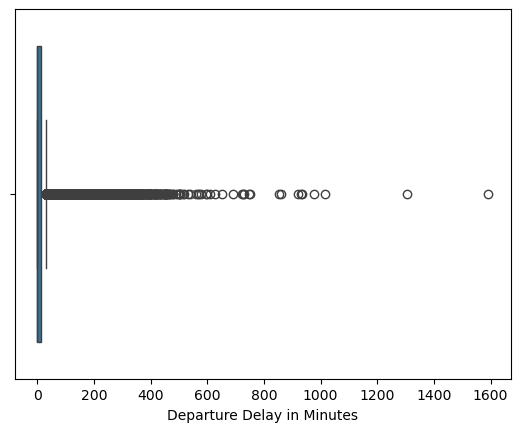

In [161]:
# Drop outliers.

sns.boxplot(data = train,
            x = "Departure Delay in Minutes")

train.drop(train[train["Departure Delay in Minutes"] > 1200].index, inplace = True)

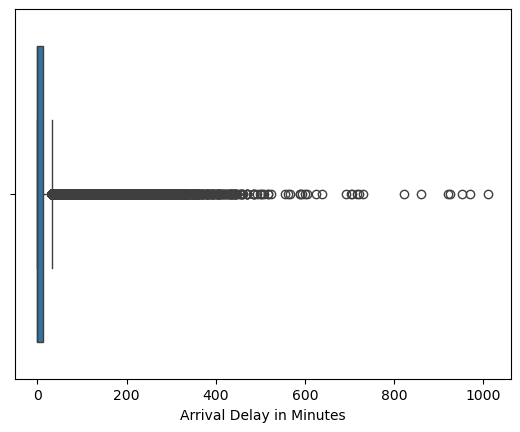

In [162]:
# Drop outliers.

sns.boxplot(data = train,
            x = "Arrival Delay in Minutes")

train.drop(train[train["Arrival Delay in Minutes"] > 900].index, inplace = True)

In [163]:
train['satisfaction'] = train['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})

<Axes: >

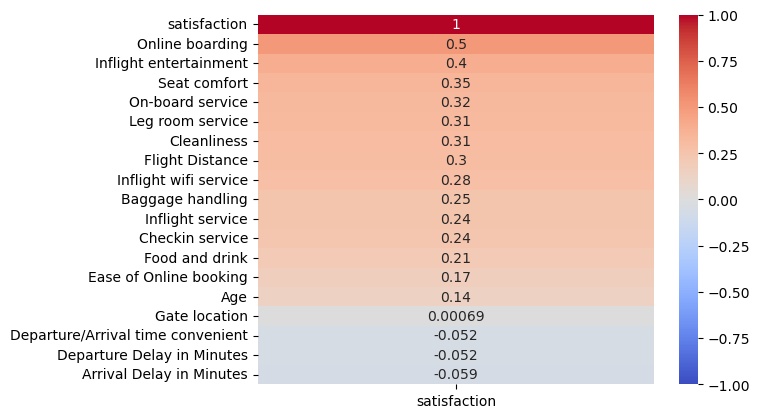

In [164]:
# Heatmap

train_int = train[["Age",
                   "Flight Distance",
                   "Inflight wifi service",
                   "Departure/Arrival time convenient",
                   "Ease of Online booking",
                   "Gate location",
                   "Food and drink",
                   "Online boarding",
                   "Seat comfort",
                   "Inflight entertainment",
                   "On-board service",
                   "Leg room service",
                   "Baggage handling",
                   "Checkin service",
                   "Inflight service",
                   "Cleanliness",
                   "Departure Delay in Minutes",
                   "Arrival Delay in Minutes",
                   "satisfaction"]].copy()

sns.heatmap(train_int.corr()[["satisfaction"]].sort_values(by = "satisfaction", ascending = False),
           vmin = -1,
           vmax = 1,
           cmap = "coolwarm",
           annot = True)

Text(0.5, 0, 'Customer Type')

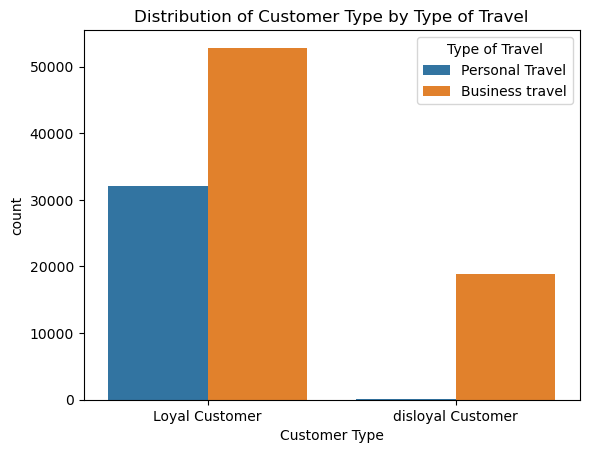

In [165]:
# Bar Graph of Customer Type

sns.countplot(data = train,
              x = "Customer Type",
              hue = "Type of Travel")
plt.title("Distribution of Customer Type by Type of Travel")
plt.xlabel("Customer Type")

# plt.savefig("images/plot1.png")

The above countplot displays the distribution of types of customers by their type of travel. There are more loyal customers over disloyal customers and business travel seems to be more popular over personal travel in both categories.

Text(0.5, 0, 'Age')

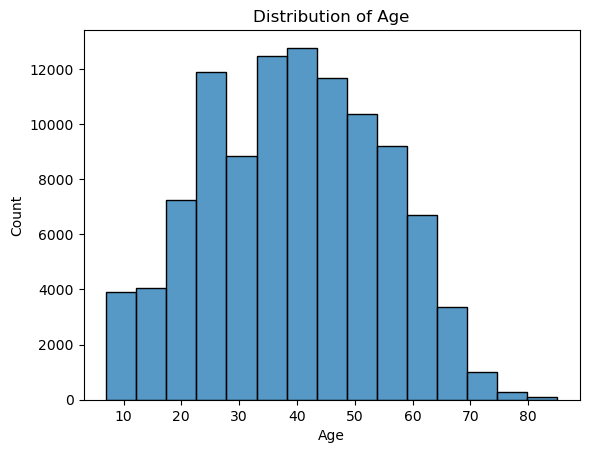

In [167]:
# Age Distribution

sns.histplot(data = train,
             x = "Age",
             bins = 15)
plt.title("Distribution of Age")
plt.xlabel("Age")

# plt.savefig("images/plot2.png")

The above histogram displays the distribution of ages from the dataset, the data is distributed normally.

Text(0, 0.5, 'Flight Distance')

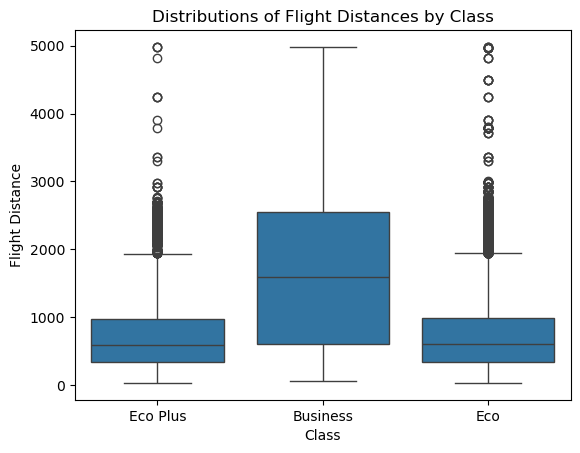

In [169]:
# Boxplots of Flight Distances by Class

sns.boxplot(data = train,
           x = "Class",
           y = "Flight Distance")
plt.title("Distributions of Flight Distances by Class")
plt.xlabel("Class")
plt.ylabel("Flight Distance")

# plt.savefig("images/plot3.png")

The above side-by-side boxplots display the distributions of flight distances by class. Business class has a higher average flight distance and interquartile range than both eco and eco plus. More people are more likely to choose business class on longer flights because of its more comfortable seating and elevated service.

Text(0.5, 0, 'Online Boarding Rating')

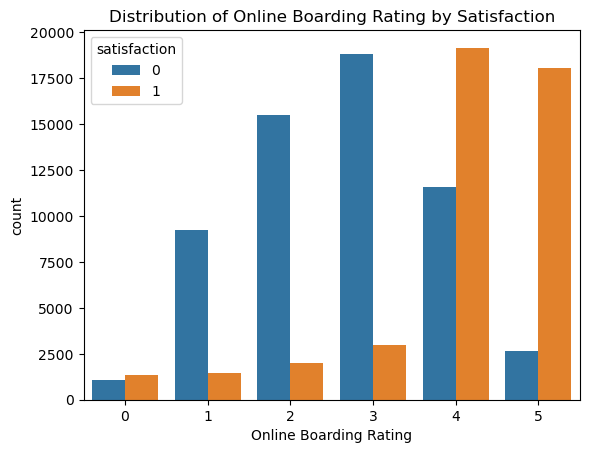

In [171]:
# Bar Graph of Customer Type

sns.countplot(data = train,
              x = "Online boarding",
              hue = "satisfaction")
plt.title("Distribution of Online Boarding Rating by Satisfaction")
plt.xlabel("Online Boarding Rating")

# plt.savefig("images/plot4.png")

The above countplot displays the online boarding ratings by satisfaction where 0 is neutral or dissatisfied and 1 is satisfied. The data shown displays as rating increases, satisfaction also increases.

Text(0, 0.5, 'Arival Delay (minutes)')

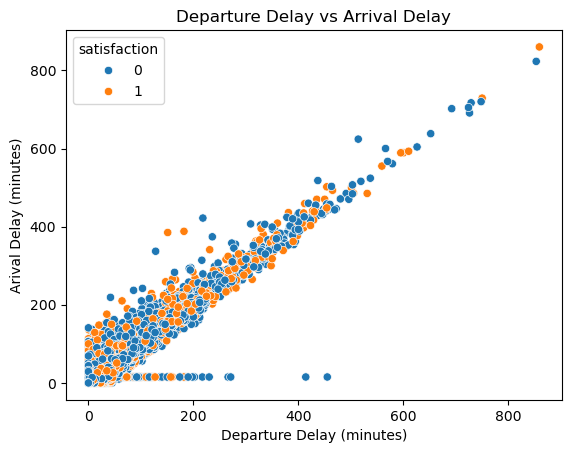

In [173]:
# Scatterplot of Departure Delay vs Arrival Delay

sns.scatterplot(data = train,
               x = "Departure Delay in Minutes",
               y = "Arrival Delay in Minutes",
               hue = "satisfaction")

plt.title("Departure Delay vs Arrival Delay")
plt.xlabel("Departure Delay (minutes)")
plt.ylabel("Arival Delay (minutes)")

# plt.savefig("images/plot5.png")

The above scatterplot shows a positive relationship between departure delay and arrival delay grouped by satisfaction. As departure delay time increases, arrival delay time also increases and most are neutral or dissatisfied due to lack of unpunctuality.

Text(0, 0.5, 'Flight Distance')

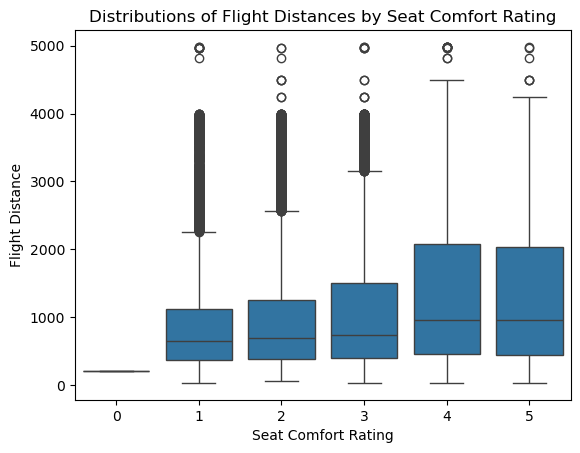

In [175]:
# Boxplots of Flight Distances by Seat Comfort

sns.boxplot(data = train,
           x = "Seat comfort",
           y = "Flight Distance")
plt.title("Distributions of Flight Distances by Seat Comfort Rating")
plt.xlabel("Seat Comfort Rating")
plt.ylabel("Flight Distance")

# plt.savefig("images/plot6.png")

The above side-by-side boxplots display the distributions of flight distances by seat comfort rating. The data shows that as flight distance increases, average seat comfort rating also increases.

In [51]:
print(train['Gender'].unique())
print(train['Customer Type'].unique())
print(train['Type of Travel'].unique())
print(train['Class'].unique())

['Male' 'Female']
['Loyal Customer' 'disloyal Customer']
['Personal Travel' 'Business travel']
['Eco Plus' 'Business' 'Eco']


In [52]:
train['Gender'] = train['Gender'].str.strip().str.lower()
train['Customer Type'] = train['Customer Type'].str.strip().str.lower()
train['Type of Travel'] = train['Type of Travel'].str.strip().str.lower()
train['Class'] = train['Class'].str.strip().str.lower()

In [53]:
print(train['Gender'].unique())
print(train['Customer Type'].unique())
print(train['Type of Travel'].unique())
print(train['Class'].unique())

['male' 'female']
['loyal customer' 'disloyal customer']
['personal travel' 'business travel']
['eco plus' 'business' 'eco']


In [54]:
# Gender Mapping
train['Gender'] = train['Gender'].map({'male': 0, 'female': 1})

# Customer Type Mapping
train['Customer Type'] = train['Customer Type'].map({'loyal customer': 1, 'disloyal customer': 0})

# Type of Travel Mapping
train['Type of Travel'] = train['Type of Travel'].map({'business travel': 1, 'personal travel': 0})

# Class Mapping
train['Class'] = train['Class'].map({'eco': 0, 'eco plus': 1, 'business': 2})

In [55]:
print(train[['Gender', 'Customer Type', 'Type of Travel', 'Class']].isna().sum())

Gender            0
Customer Type     0
Type of Travel    0
Class             0
dtype: int64


In [ ]:
train.to_csv('train_cleaned.csv', index = False)

In [56]:
train["satisfaction"].value_counts(normalize = True)

satisfaction
0    0.566667
1    0.433333
Name: proportion, dtype: float64

We want to get a model that has a higher accuracy than 43.33%!

In [57]:
X = train.drop(columns = ["satisfaction"])
y = train["satisfaction"]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

In [59]:
sc = StandardScaler()

In [60]:
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [61]:
knn = KNeighborsClassifier()

In [62]:
knn.fit(X_train_sc, y_train)

KNeighborsClassifier()

In [63]:
knn.score(X_train_sc, y_train)

0.9479864479864479

In [64]:
knn.score(X_test_sc, y_test)

0.9263522617901828

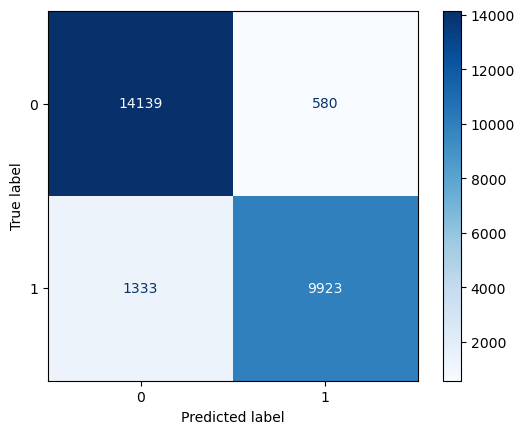

In [65]:
ConfusionMatrixDisplay.from_estimator(knn, X_test_sc, y_test, cmap = "Blues")

In [66]:
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train_sc, y_train)

knn.score(X_test_sc, y_test)

0.9263522617901828

In [122]:
scores = []

for k in range(1, 51, 2):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_sc, y_train)
    train_score = knn.score(X_train_sc, y_train)
    test_score = knn.score(X_test_sc, y_test)
    
    scores.append({"k": k, "train_score": train_score, "test_score": test_score})
    
df_score = pd.DataFrame(scores)

([<matplotlib.axis.XTick at 0x280f4d9d0>,
 [Text(1, 0, '1'),
  Text(3, 0, '3'),
  Text(5, 0, '5'),
  Text(7, 0, '7'),
  Text(9, 0, '9'),
  Text(11, 0, '11'),
  Text(13, 0, '13'),
  Text(15, 0, '15'),
  Text(17, 0, '17'),
  Text(19, 0, '19'),
  Text(21, 0, '21'),
  Text(23, 0, '23'),
  Text(25, 0, '25'),
  Text(27, 0, '27'),
  Text(29, 0, '29'),
  Text(31, 0, '31'),
  Text(33, 0, '33'),
  Text(35, 0, '35'),
  Text(37, 0, '37'),
  Text(39, 0, '39'),
  Text(41, 0, '41'),
  Text(43, 0, '43'),
  Text(45, 0, '45'),
  Text(47, 0, '47'),
  Text(49, 0, '49')])

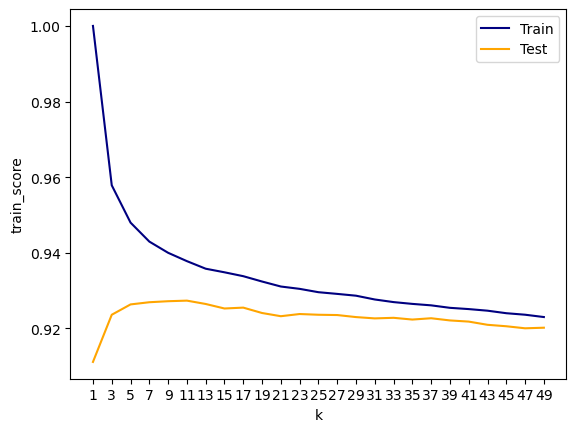

In [88]:
sns.lineplot(data = df_score, x = "k", y = "train_score", c = "navy", label = "Train")
sns.lineplot(data = df_score, x = "k", y = "test_score", c = "orange", label = "Test")
plt.xticks(range(1, 51, 2))

In [124]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train_sc, y_train)

KNeighborsClassifier(n_neighbors=7)

In [126]:
knn.score(X_train_sc, y_train)

0.9429686096352763

In [127]:
knn.score(X_test_sc, y_test)

0.9269297401347449

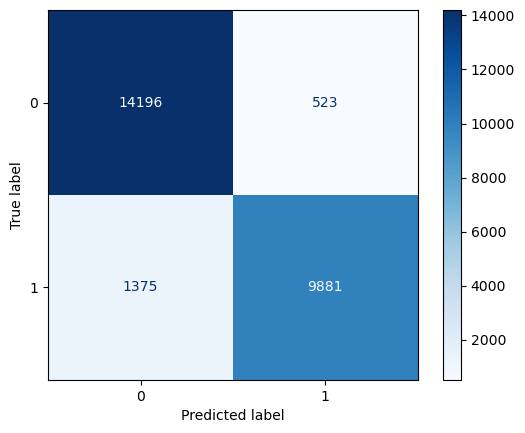

In [128]:
ConfusionMatrixDisplay.from_estimator(knn, X_test_sc, y_test, cmap = "Blues")

In [129]:
from sklearn.linear_model import LogisticRegression

In [130]:
logr = LogisticRegression()
logr.fit(X_train_sc, y_train)

LogisticRegression()

In [131]:
logr.score(X_train_sc, y_train)

0.8761838761838762

In [132]:
logr.score(X_test_sc, y_test)

0.8741482194417709

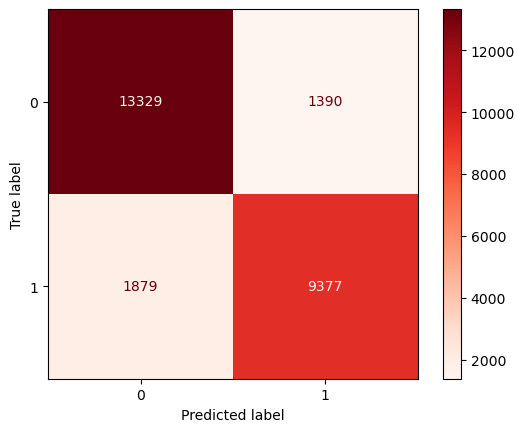

In [133]:
ConfusionMatrixDisplay.from_estimator(logr, X_test_sc, y_test, cmap = 'Reds');

In [134]:
from sklearn.ensemble import RandomForestClassifier

In [135]:
rf = RandomForestClassifier()
rf.fit(X_train_sc, y_train)

RandomForestClassifier()

In [136]:
rf.score(X_train_sc, y_train)

1.0

In [137]:
rf.score(X_test_sc, y_test)

0.9624254090471608

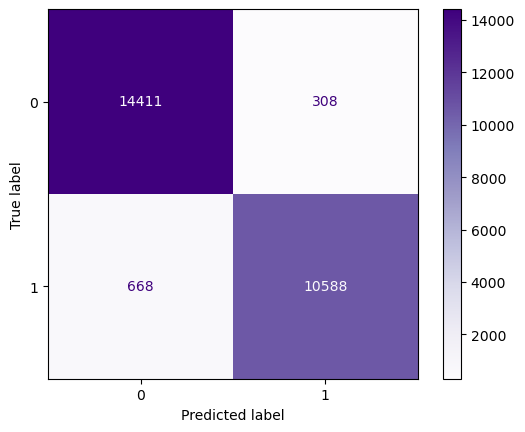

In [138]:
ConfusionMatrixDisplay.from_estimator(rf, X_test_sc, y_test, cmap = 'Purples');